# **Stock Price Prediction**




# LSTM

In [ ]:
#Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [ ]:
def dataset_transform(dataset):
  data = []
  for i in range(len(dataset)):
    a = dataset[i][0]
    data.append(float(a))
  return np.array([data])

In [ ]:
def createDataset(dataset, time_step = 1):
  datax, datay = [], []
  for i in range(len(dataset) - time_step - 1):
    a = dataset[i:(i + time_step), 0]
    datax.append(a)
    datay.append(dataset[i + time_step, 0])
  return np.array(datax), np.array(datay)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Price_Custom.csv to Google_Stock_Price_Custom.csv


In [ ]:
#Importing the data set

import io
data_set = pd.read_csv(io.BytesIO(uploaded['Google_Stock_Price_Custom.csv']))
training_set = data_set[0:int(len(data_set)*0.8)]
testing_set = data_set[int(len(data_set)*0.8):]
data_set

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"
...,...,...,...,...,...,...
1273,1/25/2017,829.62,835.77,825.06,835.67,"14,94,500"
1274,1/26/2017,837.81,838.00,827.01,832.15,"29,73,900"
1275,1/27/2017,834.71,841.95,820.44,823.31,"29,65,800"
1276,1/30/2017,814.66,815.84,799.80,802.32,"32,46,600"


In [ ]:
training_set

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"
...,...,...,...,...,...,...
1017,1/20/2016,688.61,706.85,673.26,698.45,"34,45,000"
1018,1/21/2016,702.18,719.19,694.46,706.59,"24,12,200"
1019,1/22/2016,723.60,728.13,720.12,725.25,"20,11,800"
1020,1/25/2016,723.58,729.68,710.01,711.67,"17,11,700"


In [ ]:
testing_set

,Date,Open,High,Low,Close,Volume
1022,1/27/2016,713.67,718.23,694.39,699.99,"21,94,200"
1023,1/28/2016,722.22,733.69,712.35,730.96,"26,76,400"
1024,1/29/2016,731.53,744.99,726.80,742.95,"34,74,300"
1025,02-01-2016,750.46,757.86,743.27,752,"51,39,200"
1026,02-02-2016,784.50,789.87,764.65,764.65,"63,48,100"
...,...,...,...,...,...,...
1273,1/25/2017,829.62,835.77,825.06,835.67,"14,94,500"
1274,1/26/2017,837.81,838.00,827.01,832.15,"29,73,900"
1275,1/27/2017,834.71,841.95,820.44,823.31,"29,65,800"
1276,1/30/2017,814.66,815.84,799.80,802.32,"32,46,600"


In [ ]:
train_set_org = training_set.iloc[:,1:2].values
test_set_org = testing_set.iloc[:,1:2].values
print(train_set_org, test_set_org)

[[325.25]
 [331.27]
 [329.83]
 ...
 [723.6 ]
 [723.58]
 [713.85]] [[713.67]
 [722.22]
 [731.53]
 [750.46]
 [784.5 ]
 [770.22]
 [722.81]
 [703.87]
 [667.85]
 [672.32]
 [686.86]
 [675.  ]
 [690.26]
 [692.98]
 [698.09]
 [710.  ]
 [695.03]
 [707.45]
 [701.45]
 [688.92]
 [700.01]
 [708.58]
 [700.32]
 [703.62]
 [719.  ]
 [718.68]
 [714.99]
 [706.9 ]
 [688.59]
 [698.47]
 [708.12]
 [720.  ]
 [726.81]
 [726.92]
 [726.37]
 [736.45]
 [741.86]
 [736.5 ]
 [737.46]
 [742.36]
 [732.01]
 [736.79]
 [734.59]
 [750.1 ]
 [749.25]
 [738.6 ]
 [750.06]
 [738.  ]
 [735.77]
 [745.37]
 [743.97]
 [743.02]
 [738.  ]
 [749.16]
 [754.01]
 [753.98]
 [760.46]
 [769.51]
 [758.  ]
 [755.38]
 [726.3 ]
 [716.1 ]
 [725.42]
 [707.29]
 [708.26]
 [690.7 ]
 [697.63]
 [696.87]
 [690.49]
 [697.7 ]
 [698.38]
 [712.  ]
 [716.75]
 [723.41]
 [717.06]
 [711.93]
 [709.13]
 [715.99]
 [703.67]
 [702.36]
 [701.62]
 [706.53]
 [706.86]
 [720.76]
 [722.87]
 [724.01]
 [731.74]
 [734.53]
 [732.5 ]
 [729.27]
 [724.91]
 [719.84]
 [723.96]
 [72

In [ ]:
#Feature Scaling using Normalization

xscaler = MinMaxScaler()
yscaler = MinMaxScaler()
train_set = xscaler.fit_transform(train_set_org)
test_set = yscaler.fit_transform(test_set_org)
print(train_set[:5], test_set[:5])

[[0.09272735]
 [0.10482833]
 [0.10193375]
 [0.09893865]
 [0.08627483]] [[0.26959285]
 [0.3198988 ]
 [0.37467639]
 [0.48605554]
 [0.68633796]]


In [ ]:
#Getting the inputs

time_steps = 100
x_train, y_train = createDataset(train_set,time_steps)
x_test, y_test = createDataset(test_set,time_steps)      
x_train.shape         

(921, 100)

In [ ]:
#Reshaping the data 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # batch size, time steps, features 
print(x_train.shape)
print(y_train.shape)

(921, 100, 1)
(921,)


In [ ]:
#Initializing the RNN
regressor = Sequential()

#Adding the input layer and LSTM layer
regressor.add(LSTM(units = 10, activation = 'sigmoid', input_shape = (time_steps, 1))) 
'''
  - Sigmoid functions gives better results than tanh fucntion 

'''

#Adding the output layer
regressor.add(Dense(units = 1)) 
'''
  - As we expect output n+1th day stock price, there will be only 1 Neuron so units = 1

'''

'\n  - As we expect output n+1th day stock price, there will be only 1 Neuron so units = 1\n\n'

In [ ]:
#Compiling the RNN

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

#Fitting the RNN

regressor.fit(x_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
921/921 [==============================] - 2s 2ms/step - loss: 0.0743
Epoch 2/200
921/921 [==============================] - 1s 1ms/step - loss: 0.0390
Epoch 3/200
921/921 [==============================] - 1s 1ms/step - loss: 0.0362
Epoch 4/200
921/921 [==============================] - 1s 1ms/step - loss: 0.0340
Epoch 5/200
921/921 [==============================] - 1s 1ms/step - loss: 0.0316
Epoch 6/200
921/921 [==============================] - 1s 1ms/step - loss: 0.0290
Epoch 7/200
921/921 [==============================] - 1s 1ms/step - loss: 0.0263
Epoch 8/200
921/921 [==============================] - 1s 1ms/step - loss: 0.0236
Epoch 9/200
921/921 [==============================] - 1s 1ms/step - loss: 0.0207
Epoch 10/200
921/921 [==============================] - 1s 1ms/step - loss: 0.0178
Epoch 11/200
921/921 [==============================] - 1s 1ms/step - loss: 0.0149
Epoch 12/200
921/921 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 13/200


In [ ]:
#Predicting the stock price

inputs = x_test
inputs = np.reshape(inputs, (inputs.shape[0],inputs.shape[1],1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = yscaler.inverse_transform(predicted_stock_price)
y_test = yscaler.inverse_transform(y_test.reshape(-1,1))
print(predicted_stock_price[:5], y_test[:5])

[[712.62976]
 [705.28436]
 [702.9425 ]
 [702.2493 ]
 [700.64056]] [[698.77]
 [698.4 ]
 [699.06]
 [697.45]
 [675.17]]


In [ ]:
math.sqrt(mean_squared_error(y_test,predicted_stock_price))

8.702532747733054

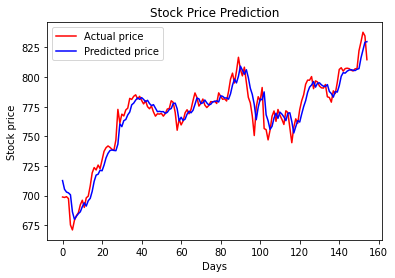

In [ ]:
#Visualizing the results

plt.plot(y_test, color = 'red', label = "Actual price")
plt.plot(predicted_stock_price, color = "blue", label = "Predicted price")
plt.title("Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Stock price")
plt.legend()
plt.show()

In [ ]:
real_stock_price = training_set.iloc[:,1:2].values
real_stock_price[:5]

array([[325.25],
       [331.27],
       [329.83],
       [328.34],
       [322.04]])

In [ ]:
predicted_stock_price_train = regressor.predict(x_train)
predicted_stock_price_train = xscaler.inverse_transform(predicted_stock_price_train)
predicted_stock_price_train[:5]

array([[306.25735],
       [304.00574],
       [301.8678 ],
       [298.93515],
       [298.23416]], dtype=float32)

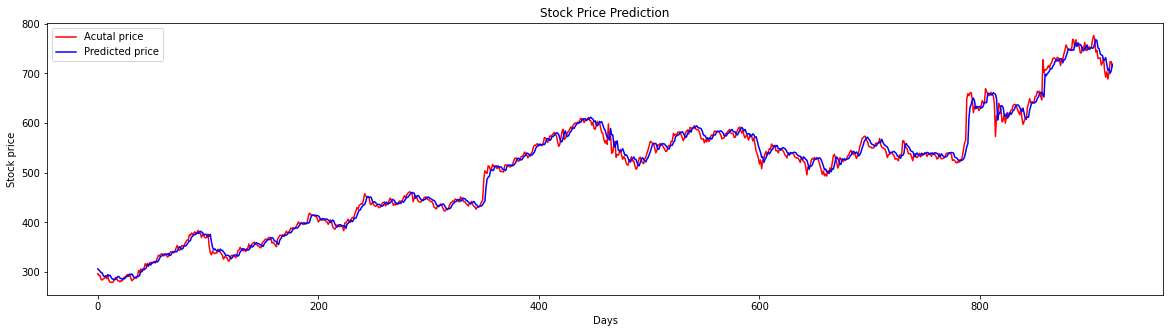

In [ ]:
#Visualizing the results
plt.figure(figsize = (20,5))
plt.plot(real_stock_price[time_steps+1:], color = 'red', label = "Acutal price")
plt.plot(predicted_stock_price_train, color = "blue", label = "Predicted price")
plt.title("Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Stock price")
plt.legend()
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Google_Stock_Validate.csv to Google_Stock_Validate (1).csv


In [ ]:
import io
latest_dataset1 = pd.read_csv(io.BytesIO(uploaded['Google_Stock_Validate.csv']))
latest_dataset1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-03,1462.000000,1490.000000,1458.989990,1485.939941,1485.939941,3055200
1,2020-02-04,1457.069946,1469.500000,1426.300049,1447.069946,1447.069946,3933000
2,2020-02-05,1462.420044,1463.839966,1430.560059,1448.229980,1448.229980,1986200
3,2020-02-06,1450.329956,1482.000000,1449.569946,1476.229980,1476.229980,1679400
4,2020-02-07,1467.300049,1485.839966,1466.349976,1479.229980,1479.229980,1172300
...,...,...,...,...,...,...,...
97,2020-06-22,1429.000000,1452.750000,1423.209961,1451.859985,1451.859985,1542400
98,2020-06-23,1455.640015,1475.941040,1445.239990,1464.410034,1464.410034,1429800
99,2020-06-24,1461.510010,1475.420044,1429.750000,1431.969971,1431.969971,1756000
100,2020-06-25,1429.900024,1442.900024,1420.000000,1441.329956,1441.329956,1230500


In [ ]:
realprice = latest_dataset1[time_steps:time_steps+1].iloc[:,1:2].values
realprice

array([[1429.900024]])

In [ ]:
latest_dataset = latest_dataset1[:time_steps]
latest_dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-03,1462.000000,1490.000000,1458.989990,1485.939941,1485.939941,3055200
1,2020-02-04,1457.069946,1469.500000,1426.300049,1447.069946,1447.069946,3933000
2,2020-02-05,1462.420044,1463.839966,1430.560059,1448.229980,1448.229980,1986200
3,2020-02-06,1450.329956,1482.000000,1449.569946,1476.229980,1476.229980,1679400
4,2020-02-07,1467.300049,1485.839966,1466.349976,1479.229980,1479.229980,1172300
...,...,...,...,...,...,...,...
95,2020-06-18,1449.160034,1451.410034,1427.010010,1435.959961,1435.959961,1581900
96,2020-06-19,1444.000000,1447.800049,1421.349976,1431.719971,1431.719971,3157900
97,2020-06-22,1429.000000,1452.750000,1423.209961,1451.859985,1451.859985,1542400
98,2020-06-23,1455.640015,1475.941040,1445.239990,1464.410034,1464.410034,1429800


In [ ]:
transformed_ds = latest_dataset.iloc[:,1:2].values
print(transformed_ds)
valid_xtrain = dataset_transform(transformed_ds)
testscaler = MinMaxScaler()

[[1462.      ]
 [1457.069946]
 [1462.420044]
 [1450.329956]
 [1467.300049]
 [1474.319946]
 [1511.810059]
 [1514.47998 ]
 [1512.689941]
 [1515.599976]
 [1515.      ]
 [1525.069946]
 [1522.      ]
 [1508.030029]
 [1426.109985]
 [1433.      ]
 [1396.140015]
 [1362.060059]
 [1277.5     ]
 [1351.609985]
 [1399.420044]
 [1359.22998 ]
 [1350.199951]
 [1277.060059]
 [1205.300049]
 [1260.      ]
 [1249.699951]
 [1126.      ]
 [1179.      ]
 [1096.      ]
 [1093.109985]
 [1056.51001 ]
 [1093.050049]
 [1135.719971]
 [1061.319946]
 [1103.77002 ]
 [1126.469971]
 [1111.800049]
 [1125.670044]
 [1125.040039]
 [1147.300049]
 [1122.      ]
 [1098.26001 ]
 [1119.015015]
 [1138.      ]
 [1221.      ]
 [1206.5     ]
 [1224.079956]
 [1209.180054]
 [1245.089966]
 [1245.609985]
 [1274.099976]
 [1284.849976]
 [1271.      ]
 [1247.      ]
 [1245.540039]
 [1271.550049]
 [1261.170044]
 [1296.      ]
 [1287.930054]
 [1341.459961]
 [1324.880005]
 [1328.5     ]
 [1308.22998 ]
 [1337.920044]
 [1361.689941]
 [1365.939

In [ ]:
may2020 = testscaler.fit_transform(valid_xtrain)
may2020.shape

(1, 100)

In [ ]:
may2020 = np.reshape(may2020, (may2020.shape[0],may2020.shape[1],1))

predicted_price_input = regressor.predict(may2020)
predict_ds = np.zeros(shape=(len(predicted_price_input), time_steps) )
predict_ds[:,0] = predicted_price_input[:,0]
predicted_price_input = testscaler.inverse_transform(predict_ds)[:,0]
realprice = np.reshape(realprice, (1))

In [ ]:
print("Predicted Price : ",predicted_price_input[0],"\nReal Stock Price: ", realprice[0])

Predicted Price :  1462.0079473480582 
Real Stock Price:  1429.900024


# Moving Average


In [ ]:
def moving_average(dataset, timestep):
  datax, datay = [], []
  for i in range(len(dataset) - timestep - 1):
    avg = dataset[i:(timestep + i), 0].sum() / timestep
    datax.append([avg])
    datay.append(dataset[i + timestep + 1])
  return np.array(datax), np.array(datay)

In [ ]:
train_set_avg = data_set.iloc[:,1:2].values
x_train_avg, y_train_avg = moving_average(train_set_avg, 30)

In [ ]:
math.sqrt(mean_squared_error(x_train_avg,y_train_avg))

25.208496738580667

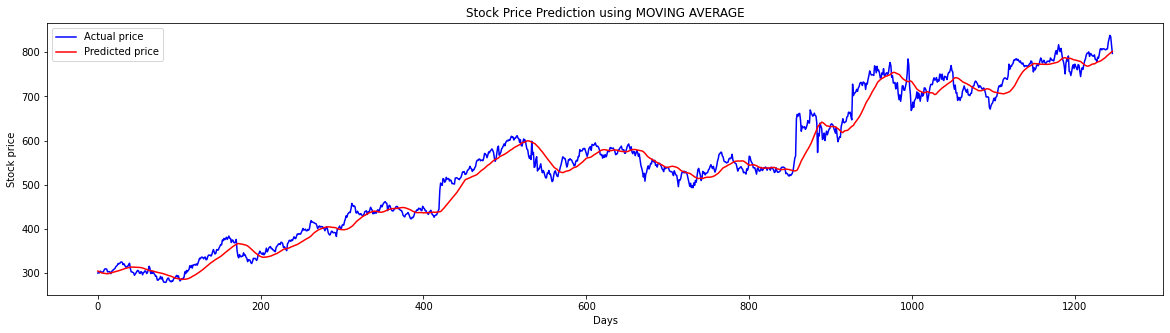

In [ ]:
#Visualizing the results
plt.figure(figsize = (20,5))
plt.plot(y_train_avg, color = 'blue', label = "Actual price")
plt.plot(x_train_avg, color = "red", label = "Predicted price")
plt.title("Stock Price Prediction using MOVING AVERAGE")
plt.xlabel("Days")
plt.ylabel("Stock price")
plt.legend()
plt.show()